### POS Tagging

In [322]:
import pandas as pd
import nltk
brown = nltk.download('brown')
from nltk.corpus import brown
import numpy as np

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Guy\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


### a - load and preprocess  Brown corpus
Use the NLTK toolkit for importing the Brown corpus. This corpus contains text from 500
sources, and the sources have been categorized by genre. Here we will use a portion of the corpus:
the “news” category. Load the tagged sentences for this portion of the corpus. Then, divide the
obtained corpus into training set and test set such that the test set is formed by the last 10% of
the sentences.

In [323]:
sentences = list(brown.tagged_sents(categories='news'))

Split train-test

In [324]:
n = len(sentences)
test_size = round(n*0.1)
train_size = n - test_size
train_sent, test_sent = sentences[:train_size], sentences[-test_size:]
print(f"train size: {len(train_sent)} sentences")
print(f"test size: {len(test_sent)} sentences")

train size: 4161 sentences
test size: 462 sentences


A given word w may be annotated with a complex tag t, containing the symbols ’+’ and/or ’-’. When
encountering such a complex tag t, consider only the suffix of t that comes before the first occurrence
of ’+’ or ’-’ in t as the POS tag of w.

In [325]:
def get_word_tags(sentences_nltk):
    return [(word, tag) for sent in sentences_nltk for (word,tag) in sent]
    
# todo: prefixes of tags!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!$!%#^@^@#^&@^$
train_words = get_word_tags(train_sent)
train_words = pd.DataFrame(train_words, columns=['word','tag'])

test_words = get_word_tags(test_sent)
test_words = pd.DataFrame(test_words, columns=['word','tag'])

print(f"train size: {len(train_words)} words; {train_words.word.nunique()} wordforms, {train_words.tag.nunique()} distinct tags")
print(f"test size: {len(test_words)} words; {test_words.word.nunique()} wordforms, {test_words.tag.nunique()} distinct tags")

train size: 90538 words; 13576 wordforms, 212 distinct tags
test size: 10016 words; 2826 wordforms, 119 distinct tags


In [326]:
print(f"{np.isin(test_words.word.unique(), train_words.word.unique()).sum()} words from test appears in train")
print(f"{np.isin(test_words.tag.unique(), train_words.tag.unique()).sum()} tags from test appears in train")

2008 words from test appears in train
113 tags from test appears in train


𝑎𝑐𝑐𝑢𝑟𝑎𝑐𝑦 = $\frac{\text{# test set word tokens with correct tag}}{\text{# test set word tokens}}$

In [327]:
print(train_words.tag.unique())
train_words.tag.apply(lambda x: x.split("+")[0].split("-")[0]).unique()
# re.split("-|+", train_words.tag.unique())

['AT' 'NP-TL' 'NN-TL' 'JJ-TL' 'VBD' 'NR' 'NN' 'IN' 'NP$' 'JJ' '``' "''"
 'CS' 'DTI' 'NNS' '.' 'RBR' ',' 'WDT' 'HVD' 'VBZ' 'CC' 'IN-TL' 'BEDZ'
 'VBN' 'NP' 'BEN' 'TO' 'VB' 'RB' 'DT' 'PPS' 'DOD' 'AP' 'BER' 'HV' 'DTS'
 'VBG' 'PPO' 'QL' 'JJT' 'ABX' 'NN-HL' 'VBN-HL' 'WRB' 'CD' 'MD' 'BE' 'JJR'
 'VBG-TL' 'BEZ' 'NN$-TL' 'HVZ' 'ABN' 'PN' 'PPSS' 'PP$' 'DO' 'NN$' 'NNS-HL'
 'WPS' '*' 'EX' 'VB-HL' ':' '(' ')' 'NNS-TL' 'NPS' 'JJS' 'RP' '--' 'BED'
 'OD' 'BEG' 'AT-HL' 'VBG-HL' 'AT-TL' 'PPL' 'DOZ' 'NP-HL' 'NR$' 'DOD*'
 'BEDZ*' ',-HL' 'CC-TL' 'MD*' 'NNS$' 'PPSS+BER' "'" 'PPSS+BEM' 'CD-TL'
 'RBT' '(-HL' ')-HL' 'MD-HL' 'VBZ-HL' 'IN-HL' 'JJ-HL' 'PPLS' 'CD-HL' 'WPO'
 'JJS-TL' 'ABL' 'BER-HL' 'PPS+HVZ' 'VBD-HL' 'RP-HL' 'MD*-HL' 'AP-HL'
 'CS-HL' 'DT$' 'HVN' 'FW-IN' 'FW-DT' 'VBN-TL' 'NR-TL' 'NNS$-TL' 'FW-NN'
 'HVG' 'DTX' 'OD-TL' 'BEM' 'RB-HL' 'PPSS+MD' 'NPS-HL' 'NPS$' 'WP$'
 'NN-TL-HL' 'CC-HL' 'PPS+BEZ' 'AP-TL' 'UH-TL' 'BEZ-HL' 'TO-HL' 'DO*'
 'VBN-TL-HL' 'NNS-TL-HL' 'DT-HL' 'BE-HL' 'DOZ*' 'QLP' 'JJR-HL' 'PPSS+HV

array(['AT', 'NP', 'NN', 'JJ', 'VBD', 'NR', 'IN', 'NP$', '``', "''", 'CS',
       'DTI', 'NNS', '.', 'RBR', ',', 'WDT', 'HVD', 'VBZ', 'CC', 'BEDZ',
       'VBN', 'BEN', 'TO', 'VB', 'RB', 'DT', 'PPS', 'DOD', 'AP', 'BER',
       'HV', 'DTS', 'VBG', 'PPO', 'QL', 'JJT', 'ABX', 'WRB', 'CD', 'MD',
       'BE', 'JJR', 'BEZ', 'NN$', 'HVZ', 'ABN', 'PN', 'PPSS', 'PP$', 'DO',
       'WPS', '*', 'EX', ':', '(', ')', 'NPS', 'JJS', 'RP', '', 'BED',
       'OD', 'BEG', 'PPL', 'DOZ', 'NR$', 'DOD*', 'BEDZ*', 'MD*', 'NNS$',
       "'", 'RBT', 'PPLS', 'WPO', 'ABL', 'DT$', 'HVN', 'FW', 'HVG', 'DTX',
       'BEM', 'NPS$', 'WP$', 'UH', 'DO*', 'DOZ*', 'QLP', 'PP$$', 'HVD*',
       'BEZ*', 'AP$', 'RB$', 'CD$', 'BER*', 'PN$', 'BED*', 'HVZ*'],
      dtype=object)

In [328]:
def compute_error_rate(y, pred_y):
    accuracy = (y == pred_y).mean()
    return 1-accuracy

### b - Baseline - most likely tag

1. Using the training set, compute for each word the tag that maximizes p(tag|word), based
on the maximum likelihood estimation. Assume that the most likely tag of all the unknown
words is “NN”. (Unknown words are words that appear in the test set but not in the training
set.)
2. Using the test set, compute the error rate (i.e., 1−accuracy) for known words and for unknown
words, as well as the total error rate.


In [ ]:
# basline fit
bag = train_words.copy()
bag['word_tag_count'] = bag.reset_index().groupby(['word','tag'])['index'].transform('count')
bag['word_count'] = bag.groupby('word')['tag'].transform('count')
bag['MLE'] = bag.word_tag_count / bag.word_count
bag = bag.drop_duplicates(['word','tag'])
baseline_model = bag.groupby(['word'])[['tag','MLE']].max()['tag'].reset_index()
print(f'"trained" on {bag.word.nunique()} unique words, and {bag.tag.nunique()} unique tags')

In [ ]:
# predict!
unknown_words_tag = 'NN' # no need cause all test is in train.
result = pd.merge(test_words, baseline_model, on='word', how='left', suffixes=['_label', '_pred'])

Evaluate baseline

In [ ]:
only_known = result.dropna()
only_unknown = result[result.tag_pred.isna()].fillna(unknown_words_tag)
total = result.fillna(unknown_words_tag)
print("Error rate for known words: ", compute_error_rate(only_known.tag_label, only_known.tag_pred))

print("Error rate for unknown words: ", compute_error_rate(only_unknown.tag_label, only_unknown.tag_pred))

print("Total Error rate: ", compute_error_rate(total.tag_label, total.tag_pred))

### c - Implementation of a bigram HMM tagger

### Training phase
Compute the transition and emission probabilities of a bigram HMM tagger
directly on the training set using maximum likelihood estimation.

In [ ]:
ASTERIX, START_TOKEN, STOP_TOKEN = "*", "START", "STOP"
sentence_num = 0
rows = []
for sent in train_sent:
    rows.append({'word':ASTERIX, 'tag':START_TOKEN, 'sent_id':sentence_num})
    for word, tag in sent:
        rows.append({'word':word, 'tag':tag, 'sent_id':sentence_num})
    rows.append({'word':ASTERIX, 'tag':STOP_TOKEN, 'sent_id':sentence_num})
    sentence_num += 1

HMM_mle = pd.DataFrame(rows)

In [ ]:
first_last = HMM_mle.groupby('sent_id').apply(lambda g: g.iloc[[1,-2]])[['word']]
# HMM_mle.groupby('sent_id').count().iloc[:,0]-2

In [ ]:
first_last

In [ ]:
next_tag = HMM_mle.tag[1:]
next_tag.index = next_tag.index-1
HMM_mle['next_tag'] = next_tag

In [ ]:
HMM_mle.tag.nunique(), HMM_mle.next_tag.nunique()

In [ ]:
HMM_mle

**Calculate Transitions probabilities (Bigram)**

$\hat{q}(y_{i+1}|y_i)= \frac{\#(y_{i+1},y_i)}{\sum_{y}\#(y_i,y)}= \frac{(\#y_i,y_{i+1})}{\#y_{i}}$

In [ ]:
joint_tag_frequency = HMM_mle.groupby(['tag','next_tag'])[['word']].count()\
                        .rename(columns={'word':'joint_frequency'}).reset_index()
tag_frequency = HMM_mle.groupby('tag')[['word']].count().reset_index().rename(columns={'word':'tag_frequency'})
tag_frequency.shape, joint_tag_frequency.shape

In [ ]:
transitions = pd.merge(tag_frequency, joint_tag_frequency, on='tag', how='right')
transitions['transition_prob'] = transitions.joint_frequency / transitions.tag_frequency
transitions = transitions.drop(columns=['tag_frequency', 'joint_frequency'])
transitions = transitions.drop_duplicates()
print(f"There are {transitions.tag.nunique()} distinct tags, and {transitions.next_tag.nunique()} next_tags (should equal and same as num of tags in emission table).")
transitions.set_index(['next_tag','tag'], inplace=True)
print("Number of joint events - ", transitions.shape[0])

transitions.plot.hist(bins=100)

In [ ]:
# zero garbage transitions that were created in process -
# * -> START (when start is in next_tag), and STOP->* (when STOP is in tag column)
# its the same case
transitions.loc[START_TOKEN] = 0
transitions.loc[[START_TOKEN]]

**Calculate Emission probabilities**

$\hat{e}(x_i|y_i)= \frac{\#(x_i,y_i)}{\sum_{x}\#(x,y_i)}= \frac{\#(x_i,y_i)}{\#(y_i)}$

In [ ]:
word_tag_freq = HMM_mle.reset_index().groupby(['word','tag'])[['index']].count().rename(columns={'index':'word_tag_frequency'}).reset_index()
print("size of word-tag frequency table is ", word_tag_freq.shape, f'With {word_tag_freq.tag.nunique()} distinct tags')

In [ ]:
emissions = pd.merge(tag_frequency, word_tag_freq, on='tag',how='right')
print("Emission table size is", emissions.shape)
emissions['emission_prob'] = emissions.word_tag_frequency / emissions.tag_frequency
emissions = emissions.drop(columns=['tag_frequency', 'word_tag_frequency']).drop_duplicates()
emissions = emissions.set_index(['word', 'tag'])
emissions.plot.hist(bins=100)

In [ ]:
# check that STOP and START have correct emissions
check = emissions.reset_index()
check[check.tag.isin([START_TOKEN, STOP_TOKEN])]

In [ ]:
check[check.word == ASTERIX]

### Inference stage 
Implement the Viterbi algorithm corresponding to the bigram HMM model. (Choose an arbitrary tag for unknown words.)

In [ ]:
# make sure that the tags are aligned (match by order)
print("Tag column for emission and transimition are aligned?", np.all(emissions.reset_index().tag.unique() == transitions.reset_index().tag.unique()))
# note that tag and next tag are not aligned by definition

In [ ]:
S = emissions.reset_index().tag.unique()


In [ ]:
# making transition a table containing the cartesian product of tag (y_i-1) and next_tag (y_i)
emissions = emissions.unstack().fillna(0).stack()
transitions = transitions.unstack().fillna(0)
transitions.columns = transitions.columns.droplevel()

In [ ]:
known_words = set(emissions.reset_index().word.unique())


In [ ]:
        pi = np.zeros((len(y_sentence) + 1, len(self.S)))
        pi[0, self.__start_token_idx] = 1
        result = []
        for k, word in enumerate(y_sentence):
            if word in self.__known_words:
                # dot product between row vectors pi[k] and transition[next_tag]
                next_tag_prob = (self.__q_prob * pi[k]).max(axis=1)
                # dot product between two row vectors
                next_tag_prob = next_tag_prob * self.__e_prob.loc[word].values[:, 0]
                pi[k + 1] = next_tag_prob  # the next_tag probability row
                result.append((word, self.S[next_tag_prob.argmax()]))
            else:
                pi[k + 1] = np.zeros(len(self.S))  # the next_tag probability row
                pi[k + 1, self.__unknown_word_idx] = 1
                result.append((word, np.nan))
        return pd.DataFrame(result)

In [ ]:
def parse_test_set(test_set):
    sentences = []
    labels = []
    for sent in test_sent:
        words = []
        tags = []
        for w, t in sent:
            words.append(w)
            tags.append(t)
        sentences.append(words)
        labels.append(tags)
    return sentences, labels


### Run the algorithm from c)ii) on the test set. Compute the error rates and compare to the results from b)ii).

In [ ]:
import time
test_sentences, test_labels = parse_test_set(test_sent)
predictions = []
labels = []
start = time.time()
for i, sentence in enumerate(test_sentences):
    pred = viterby_inference(sentence)
    # save as words for evaluation by words and their tags
    sent_words = pd.DataFrame(pred)
    sent_words['label'] = test_labels[i]
    predictions.append(sent_words)
print("Took ", (time.time()-start)/60, " minutes.")

In [ ]:
evaluate = pd.concat(predictions)
evaluate.columns = ['word', 'tag', 'label']

In [ ]:
HMM_known = evaluate.dropna()
HMM_only_unknown = evaluate[evaluate.tag.isna()].fillna(unknown_words_tag)
HMM_total = evaluate.fillna(unknown_words_tag)
print("Error rate for known words: ", compute_error_rate(HMM_known.label, HMM_known.tag))

print("Error rate for unknown words: ", compute_error_rate(HMM_only_unknown.label, HMM_only_unknown.tag))

print("Total Error rate: ", compute_error_rate(HMM_total.label, HMM_total.tag))

### Add-1 Smoothing
$\hat{e}_\delta(x_i|y_i) = \frac{\#(x_i,y_i)+\delta}{\#(y_i)+\delta \cdot |V|}$

In [ ]:
laplace = 1
smooth_emissions = pd.merge(tag_frequency, word_tag_freq, on='tag',how='right')
smooth_emissions['emission_prob'] = (smooth_emissions.word_tag_frequency + laplace) / (smooth_emissions.tag_frequency + len(train_words.word.unique()))
smooth_emissions = smooth_emissions.drop(columns=['tag_frequency', 'word_tag_frequency']).drop_duplicates().set_index(['word', 'tag'])

In [6]:
MONTHS_CAPS = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
               'September', 'October', 'November', 'December']
MONTHS_LOWER = [m.lower() for m in MONTHS_CAPS]

PSEUDO_DICT = {'dollars_amount': ['\$', '\d-cent'],
               'size_related': ['\d+\Wacre', '\d+\Wsize', '\d+\Wdegree', '\d+\Wyard',
                                '\d+\Wounce', '\d+\Wfoot', '\d+\Wpiece',
                                '\d+\Wunit', '\d+\Winch', '\d+\Wpound', '\d+\Wpiece'],
               'monetary_amount': ['[0-9]+\.[0-9]+', '[0-9]*(,[0-9\,]*)', '\d+%', '\d/'],
               'time_related': ['hour', 'minute', '\d:\d\d', '\d\'s'],
               'age_related': ['\Wage', '\Wold', 'year-old', '-year'],
               'calender': ['day', '\dth', 'month', '[0-9]+[-]*[st,nd]'] + MONTHS_CAPS +
                           MONTHS_LOWER,
               'two&four_digits': ['\w*[1-9]{1}[0-9]{3}\w*', '\w*[1-9]{1}[0-9]{1}\w*'],
               'groups': ['[0-9]-[a-z]'],
               'other_number': ['\d'],
               'synonym': ['[A-Z]\.'],
               'all_cap': ['^[A-Z]+$'],
               'init_cap': ['^[A-Z][a-z]+'],
               'low_case': ['^[a-z]+$']}

def adapt_pseudo_words(df):
    for category in PSEUDO_DICT.keys():
        mask = df.word.str.contains("|".join(PSEUDO_DICT[category]))
        df[category] = mask.replace({True: category, False: np.nan})
    df.insert(1, 'pseudo_words', np.nan)
    return df.fillna(method='bfill', axis=1)[['word', 'pseudo_words']]

In [ ]:
def parse_test_set(test_sent):
    sentences = []
    labels = []
    for i, sent in enumerate(test_sent):
        for w, t in sent:
            sentences.append({'word': w, 'sent_id': i})
            labels.append({'tag': t, 'sent_id': i})
    return pd.DataFrame(sentences), pd.DataFrame(labels)

test_sentences, test_labels = parse_test_set(test_sent)

In [ ]:
predictions = []
start = time.time()
print("HMM predicting....")
is_unknown_word = ~test_sentences.word.isin(emissions.reset_index().word.unique())
adapted = adapt_pseudo_words(test_sentences.loc[is_unknown_word])
test_sentences.loc[is_unknown_word, 'word'] = adapted

for i, sentence_words in test_sentences.groupby('sent_id'):
    pred = predictor.predict(sentence_words.word)
    # save as words for evaluation by words and their tags
    pred['label'] = test_labels.loc[test_labels.sent_id == i]
    predictions.append(pred)

### Pseudo-words
i. Design a set of pseudo-words for **unknown words in the test set** and **low-frequency words in
the training set**.

In [329]:
unknown_words = test_words.word[~test_words.word.isin(train_words.word)].unique()

In [330]:
word_freq = train_words.groupby('word').count()
word_freq.columns = ['freq']

In [331]:
for t in [1,2,3,5, 20, 50]:
    print("Threshold ", t, "below: ", (word_freq.freq <= t).sum(), ". above: ",(word_freq.freq > t).sum())

Threshold  1 below:  7398 . above:  6178
Threshold  2 below:  9510 . above:  4066
Threshold  3 below:  10537 . above:  3039
Threshold  5 below:  11610 . above:  1966
Threshold  20 below:  13101 . above:  475
Threshold  50 below:  13432 . above:  144


In [ ]:
low_frequency_words = word_freq[word_freq.freq <= 5].reset_index().word
low_frequency_words

In [ ]:
dollars_amount = low_frequency_words[low_frequency_words.str.startswith("$")]
low_frequency_words = low_frequency_words[~low_frequency_words.str.startswith("$")]
dollars_amount.shape

In [ ]:
size_related = ['\Wacre', '\Wsize', '\Wdegree', '\Wyard', '\Wounce']
size_words = low_frequency_words[low_frequency_words.str.contains("|".join(size_related))]
low_frequency_words = low_frequency_words[~low_frequency_words.str.contains("|".join(size_related))]
size_words.shape

In [ ]:
time_related = ['hour', 'minute', 'day']
time_words = low_frequency_words[low_frequency_words.str.contains("|".join(time_related))]
low_frequency_words = low_frequency_words[~low_frequency_words.str.contains("|".join(time_related))]
time_words.shape

In [ ]:
four_digit_number = low_frequency_words[low_frequency_words.str.contains('[1-9]{1}[0-9]{3}')]
# low_frequency_words = low_frequency_words[~low_frequency_words.str.contains('[1-9]{1}[0-9]{3}')]
list(four_digit_number)

In [ ]:
two_digit_number = low_frequency_words[low_frequency_words.str.contains('[1-9][0-9]')]
# low_frequency_words = low_frequency_words[~low_frequency_words.str.contains('\d\d')]
two_digit_number

In [ ]:
age_related = ['\Wage', '\Wold', 'year-old', '-year']
age_words = low_frequency_words[low_frequency_words.str.contains('|'.join(age_related))]
low_frequency_words = low_frequency_words[~low_frequency_words.str.contains('|'.join(age_related))]
age_words.shape

In [ ]:
days_words = low_frequency_words[low_frequency_words.str.contains('\dth')]
low_frequency_words = low_frequency_words[~low_frequency_words.str.contains('\dth')]
days_words.shape

In [ ]:
synonims = low_frequency_words[low_frequency_words.str.contains('[A-Z]\.+')]
low_frequency_words = low_frequency_words[~low_frequency_words.str.contains('[A-Z]\.+')]
synonims.shape

In [ ]:
init_cap = low_frequency_words[low_frequency_words.apply(lambda x: x[0].isupper())]
low_frequency_words = low_frequency_words[~low_frequency_words.apply(lambda x: x[0].isupper())]
init_cap.shape

In [ ]:
unclassified_numbers = low_frequency_words[low_frequency_words.str.contains('\d')]
low_frequency_words = low_frequency_words[~low_frequency_words.str.contains('\d')]
unclassified_numbers.shape

In [ ]:
lower_case = low_frequency_words[low_frequency_words.str.islower()]
low_frequency_words = low_frequency_words[~low_frequency_words.str.islower()]
lower_case.shape

In [ ]:
filtered[~filtered.str.contains("|".join(pseudo_dict[category]))]

In [ ]:
low_frequency_words

In [ ]:
def create_pseudo_words(words):
    """note that the order of categories effects output, because  after each 
    query we drop the output words from the remaining words"""
    filtered = words[:]
    data_frames=[]
    pseudo_dict = {'dollars_amount': ['\$', '\d-cent'], 
                   'size_related': ['\Wacre', '\Wsize', '\Wdegree', '\Wyard', '\Wounce', '\Wfoot', '\Wpiece', '\Wunit', '\Winch', '\Wpound', '\Wpiece'],
                   'time_related' : ['hour', 'minute', 'day', '\d:\d\d', 'month', '\d\'s', '\dth'], 
                   'age_related' = ['\Wage', '\Wold', 'year-old', '-year']
                   'monetary_percent' : ['[0-9]\.', '[0-9]*(,[0-9,]*)', '%', '/'],
                   'groups' : ['[0-9]-[a-z]'],
                   'other_number' : ['\d'],
                   'synonim' : ['[A-Z]\.+'],
                   'init_cap' : ['[A-Z][a-z]'], 
                   'all_cap' : ['[A-Z]+'], 
                   'low_case' : ['[a-z]+']}
    for category in pseudo_dict.keys():
        category_words = filtered[filtered.str.contains("|".join(pseudo_dict[category]))]
        filtered = filtered[~filtered.str.contains("|".join(pseudo_dict[category]))]
        category_dt = pd.DataFrame(category_words, columns=['word'])
        category_dt['tag'] = [category] * category_words.shape[0]
        data_frames.append(category_dt)

    return data_frames

In [ ]:
Months = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
months = [m.lower() for m in Months]

In [ ]:
def adapt_psuedo_words(words, frequency_threshold=5):
    words_df = pd.DataFrame(words)
    pseudo_dict = {'dollars_amount': ['\$', '\d-cent'], 
                    'size_related': ['\d+\Wacre', '\d+\Wsize', '\d+\Wdegree', '\d+\Wyard', '\d+\Wounce', '\d+\Wfoot', '\d+\Wpiece', 
                                     '\d+\Wunit', '\d+\Winch', '\d+\Wpound', '\d+\Wpiece'],
                    'monetary_amount' : ['[0-9]+\.[0-9]+', '[0-9]*(,[0-9\,]*)', '\d+%', '\d/'],
                    'time_related' : ['hour', 'minute', '\d:\d\d', '\d\'s'],
                    'age_related' : ['\Wage', '\Wold', 'year-old', '-year'],
                    'calender' : ['day','\dth','month', '[0-9]+[-]*[st,nd]'] + Months + months,
                    'two&four_digits' : ['\w*[1-9]{1}[0-9]{3}\w*', '\w*[1-9]{1}[0-9]{1}\w*'],
                    'groups' : ['[0-9]-[a-z]'],  
                    'other_number' : ['\d'], 
                    'synonim' : ['[A-Z]\.'],
                    'all_cap' : ['^[A-Z]+$'],
                    'init_cap' : ['^[A-Z][a-z]+'],  
                    'low_case' : ['^[a-z]+$']}
    for category in pseudo_dict.keys():
        mask = words_df.word.str.contains("|".join(pseudo_dict[category]))
        words_df[category] = mask.replace({True:category, False:np.nan})
    
    words_df.insert(1, 'psuedo_words', np.nan)
    return words_df.fillna(method='bfill', axis=1)[['word','psuedo_words']]

In [ ]:
freq_words = train_words.groupby('word').transform('count')
freq_words.columns = ['freq']

In [ ]:
adapted = adapt_psuedo_words(train_words.loc[freq_words.freq <= 5, 'word'])
# w.loc[freq_words.freq <= 5, 'word'] = 

In [ ]:
test_sentences, test_labels = parse_test_set(test_sent)


In [ ]:
rows = []
for i, sent in enumerate(test_sentences):
    for word in sent:
        rows.append({'word':word, 'sent_id':i})
result = pd.DataFrame(rows,dtype='int').set_index('sent_id')
    
result

In [ ]:
# for idx in result.index:
#     result.iloc[idx]
    
result.groupby('sent_id')

ii. Using the pseudo-words as well as maximum likelihood estimation (as in c)i)), run the Viterbi
algorithm on the test set. Compute the error rates and compare to the results from b)ii),
c)iii) and d)ii).


In [ ]:
train_sent

In [ ]:
np.where(S=='NN')[0][0]

iii. Using the pseudo-words as well as Add-One smoothing (as in d)i)), run the Viterbi algorithm
on the test set. Compute the error rates and compare to the results from b)ii), c)iii), d)ii)
and e)ii). For the results obtained using both pseudo-words and Add-One smoothing, build a
confusion matrix and investigate the most frequent errors. A confusion matrix is an |K| over
|K| matrix, where the (i, j) entry corresponds to the number of tokens which have a true tag
i and a predicted tag j.

In [ ]:
test_sentences[test_sentences.word.isin(PSEUDO_DICT.keys())]

In [244]:
import seaborn as sns
import matplotlib.pyplot as plt

In [455]:
evalu = pd.read_csv("evaluation.csv")
evalu = evalu.drop(columns = ['Unnamed: 0'])

evalu

,word,tag_pred,tag_label
0,Last,AP,AP
1,week,NN,NN
2,Federal,JJ,JJ
3,District,NN,NN
4,Judge,NN,NN
...,...,...,...
10011,the,",",","
10012,total,VBN,VB
10013,segregation,'',''
10014,of,.,.


In [260]:
evalu.pivot()

KeyError: 'None of [None] are in the columns'

In [456]:
confusion_matrix = pd.crosstab(evalu.tag_label, evalu.tag_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix = confusion_matrix.stack()
confusion_matrix = confusion_matrix[confusion_matrix != 0].sort_values(ascending=False).reset_index()
confusion_matrix.columns = ['Actual', 'Predicted', 'Occurences']
confusion_matrix.shape

(263, 3)

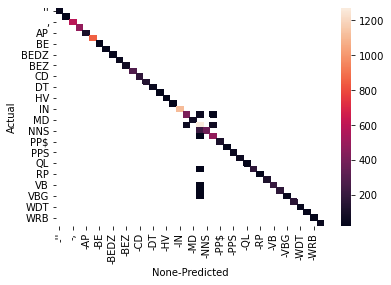

In [468]:
to_plot = confusion_matrix.head(50).set_index(['Actual','Predicted'])
to_plot.columns = ['']
to_plot = to_plot.unstack()
sns.heatmap(to_plot)


Text(0.5, 1.0, 'Num Correct predictions per tag')

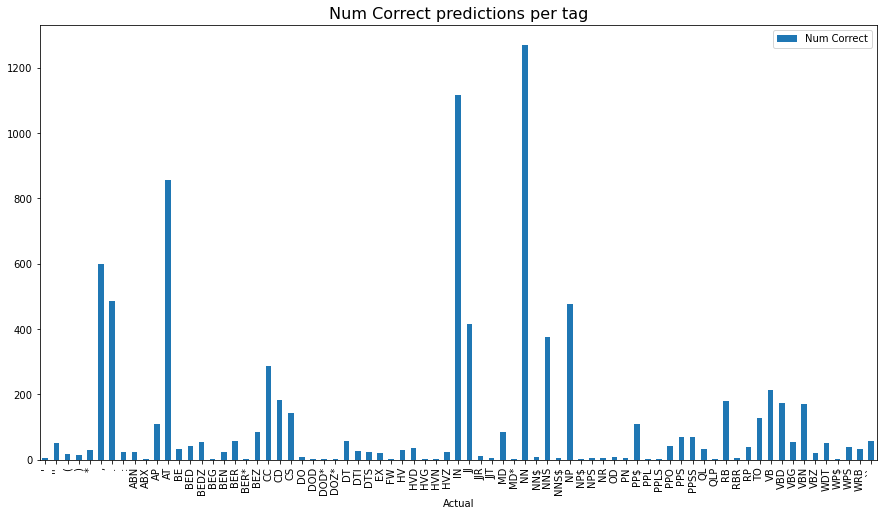

In [453]:
to_plot = confusion_matrix[confusion_matrix.Actual == confusion_matrix.Predicted]
to_plot = to_plot.groupby('Actual')[['Occurences']].sum().rename(columns={'Occurences':"Num Correct"})
to_plot = to_plot.reset_index()
ax = to_plot.plot.bar(x='Actual', y='Num Correct', figsize=(15,8))
plt.title("Num Correct predictions per tag", fontsize=16)

Text(0.5, 1.0, 'Num Errors per tag')

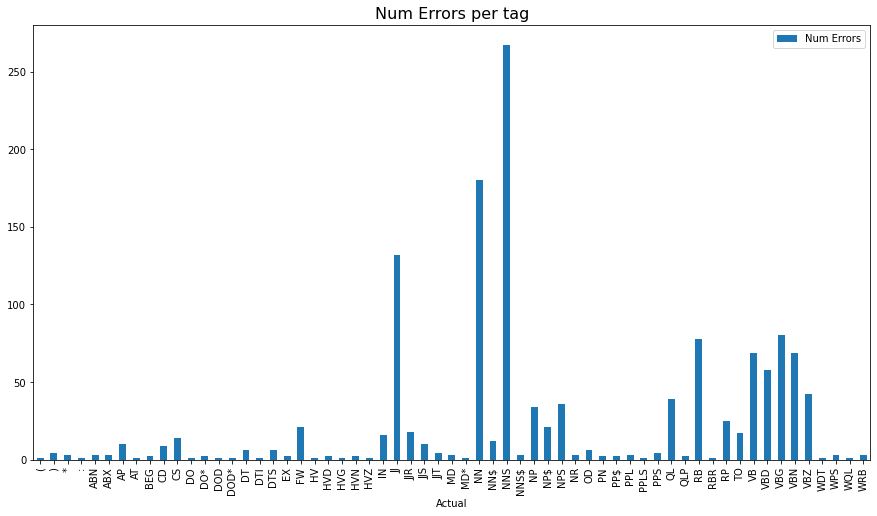

In [452]:
# top_errors = to_plot[to_plot['Num Errors'] > to_plot.mean()[0]].reset_index().Actual
to_plot = confusion_matrix[confusion_matrix.Actual != confusion_matrix.Predicted]
to_plot = to_plot.groupby('Actual')[['Occurences']].sum().rename(columns={'Occurences':"Num Errors"})
to_plot = to_plot.reset_index()
ax = to_plot.plot.bar(x='Actual', y='Num Errors', figsize=(15,8))
plt.title("Num Errors per tag", fontsize=16)

In [268]:
confusion_matrix.to_csv("Confusion_matrix.csv")

In [ ]:
joint_tag_frequency = hmm_mle.groupby(['tag', 'next_tag'])[['word']].count() \
    .rename(columns={'word': 'joint_frequency'}).reset_index()
joint_tag_frequency
# tag_frequency = hmm_mle.groupby('tag')[['word']].count().reset_index() \
#     .rename(columns={'word': 'tag_frequency'})

# transitions = pd.merge(tag_frequency, joint_tag_frequency, on='tag', how='right')
# transitions['transition_prob'] = transitions.joint_frequency / transitions.tag_frequency
# transitions = transitions.drop(columns=['tag_frequency', 'joint_frequency'])
# transitions = transitions.drop_duplicates().set_index(['next_tag', 'tag'])

# # zero garbage transitions that were created in process -
# # * -> START (when start is in next_tag), and STOP->* (when STOP is in tag column)
# # its the same case
# transitions.loc[START_TOKEN] = 0

# self.__transitions = transitions

# word_tag_freq = hmm_mle.reset_index().groupby(['word', 'tag'])[['index']].count() \
#     .rename(columns={'index': 'word_tag_frequency'}).reset_index()

# self.__emissions = self.__create_emission_tbl(tag_frequency, word_tag_freq)

In [28]:
from sentences_parser import *
from models import HMM

In [47]:
train_sentences, test_sentences = load_sentences_data()
# test_sentences, test_labels = parse_test_set(test_sentences)

Loaded sentences:
train size: 4161 sentences
test size: 462 sentences



In [157]:
final = []
for sent in test_sentences:
    rows = []
    for w,t in sent:
        rows.append({'word':w,'tag':t})
    final.append(pd.DataFrame(rows))
final = pd.concat(final)

In [158]:
final.tag.unique()

array(['AP', 'NN', 'JJ-TL', 'NN-TL', 'NP', 'VBD', 'AT', 'TO', 'VB', 'RB',
       '``', 'VBN', "''", 'CC', '.', 'PP$', 'MD', 'IN', 'ABN', 'JJ', ',',
       '--', 'NP-TL', 'QL', 'CD', 'NNS', 'HVD', 'PPSS', 'NP$', 'WRB',
       'BEDZ', 'OD', 'PPO', '(', ')', 'PPS', 'BEZ', 'CS', 'VBG', 'WDT',
       'RP', 'DT', 'BEN', ':', 'BED', 'VBZ', 'DTI', 'BER', 'HV', '*',
       'IN-TL', 'NN-HL', 'IN-HL', 'NP-HL', 'NP$-TL', 'JJS', 'WPS', 'HVZ',
       'NN$', 'CD-TL', 'NPS', 'RBR', 'PN', 'DO', 'DTS', 'BE', 'QLP',
       'PPL', 'HVG', 'ABX', 'FW-NN-TL', 'FW-JJ-TL', 'VBN-TL', 'NNS-TL',
       'JJT', 'EX', 'FW-AT', 'FW-NN', 'DOD', 'JJR', 'FW-*', 'FW-CD',
       'FW-IN', 'BEG', 'VBG-TL', 'WQL', 'NN$-TL', 'VB-TL', 'AT-HL',
       ':-HL', 'FW-WDT', 'AT-TL', 'CC-TL', "'", 'VBG-HL', 'DOD*', 'OD-TL',
       'NR', 'FW-JJ', 'FW-IN+NN', 'JJ-HL', 'NNS-HL', '.-HL', 'HVN',
       'PPS+BEZ', 'WP$', 'NNS$', 'JJR-HL', 'DTI-HL', ',-HL', 'DT+BEZ',
       'DOZ*', 'BER*', 'WDT+BEZ', 'MD*', 'PPSS+BEM', 'DO*', 'NR-TL',
     

In [162]:
# final.tag.unique()
final.tag = final.tag.apply(lambda x: x.rsplit("+")[0])
final.tag.apply(lambda x: x.rsplit("-")[0]).unique()

['', '', '']

In [32]:
print("HMM with Add-1 smoothing:")
hmm_smooth = HMM(1)
hmm_smooth.fit(train_sentences)
hmm_smooth.evaluate(test_sentences, test_labels)

HMM with Add-1 smoothing:
HMM predicting....


KeyboardInterrupt: 

In [ ]:
print("HMM with Pseudo words:")
hmm_smooth = HMM()
hmm_smooth.fit(train_sentences, pseudo_threshold=2)
hmm_smooth.evaluate(test_sentences, test_labels)

In [166]:
from pandas import DataFrame, IndexSlice
from seaborn import light_palette

# Initialize tuples of conditions.  Observations are the input
observations = (  # Modify, add, remove with any key in emit_prob_df
    "Wearing Trenchcoat & Fedora", "Browsing Reddit", "Drinking Mountain Dew",
    "Eating Doritos", "Eating Pizza")
hidden_states = ("Depressed", "Confident", "Tired", "Hungry",
                 "Thirsty")  # The confounding factors

# Probability of transition
trans_prob_df = DataFrame(
    data={  # From depressed to confident, vice-versa, static, etc.
        "Depressed": (0.20, 0.25, 0.10, 0.20, 0.20),
        "Confident": (0.15, 0.25, 0.10, 0.20, 0.25),
        "Tired": (0.25, 0.10, 0.30, 0.10, 0.15),
        "Hungry": (0.20, 0.20, 0.25, 0.30, 0.30),
        "Thirsty": (0.20, 0.20, 0.25, 0.20, 0.10)
    },  # All should vertically sum to 1
    columns=("Depressed", "Confident", "Tired", "Hungry", "Thirsty"),
    index=hidden_states)

# Probability of observation given the hidden state
emit_prob_df = DataFrame(
    data={  # Highest chance of trenchcoat & fedora is when confident
        "Eating Pizza": (0.20, 0.10, 0.10, 0.35, 0.20),
        "Browsing Reddit": (0.20, 0.10, 0.35, 0.10, 0.20),
        "Drinking Mountain Dew": (0.30, 0.10, 0.30, 0.20, 0.30),
        "Eating Doritos": (0.20, 0.10, 0.15, 0.15, 0.15),
        "Wearing Trenchcoat & Fedora": (0.10, 0.60, 0.10, 0.20, 0.15),
    },  # All should vertically sum to 1
    columns=("Eating Pizza", "Browsing Reddit", "Drinking Mountain Dew",
             "Eating Doritos", "Wearing Trenchcoat & Fedora"),
    index=hidden_states)

# Initialize starting probabilities
start_probs = DataFrame(
    data={"(0) {}".format(observations[0]): (0.10, 0.40, 0.10, 0.20, 0.20)},
    index=hidden_states)

# Initialize dynammic programming matrix at probability 0
viterbi_df = start_probs.multiply(emit_prob_df[observations[0]], axis="index")

# Start dynammic programming
for i, observation in enumerate(observations[1:]):
    max_trans_prob_df = trans_prob_df.multiply(  # Offset by 1
        viterbi_df.iloc[:, i], axis="index").max()
    # Multiply entire trans_prob df by previous viterbi_df
    # column and take vertical maximums
    viterbi_df["({}) {}".format(
        i + 1,  # Then multiply the result by the observation emissions
        observation)] = max_trans_prob_df * emit_prob_df.loc[:, observation]

# Provide the entire matrix with highest values darkest
viterbi_traceback_df = viterbi_df.style.background_gradient(
    cmap=light_palette("green", as_cmap=True))

In [171]:
# At the last column, use the maximum value to begin traceback
traceback_prob = [viterbi_df.iloc[:, -1].max()]
dyn_prog_path = [viterbi_df.iloc[:, -1].idxmax()]  # And its index

# viterbi_traceback_df.highlight_max(  # Highlight it
#     color="red", subset=IndexSlice[[viterbi_df.columns[-1]]])

# # Start traceback
# for i, observation in zip(range(len(observations) - 2, -1, -1), reversed(observations[1:])):
#     # Isolate the previous location that gives the current probability
#     traceback_loc = viterbi_df.loc[viterbi_df.iloc[:, i] * trans_prob_df.loc[:, dyn_prog_path[0]] *
#         emit_prob_df.loc[dyn_prog_path[0], observation] == traceback_prob[
#             0]].index[0]
#     # Record the value and its state
#     traceback_prob.insert(0,
#                           viterbi_df.loc[traceback_loc, viterbi_df.columns[i]])
#     dyn_prog_path.insert(0, traceback_loc)
#     viterbi_traceback_df = viterbi_traceback_df.applymap(
#         lambda x: "background-color: red",  # Color the path red
#         subset=IndexSlice[[dyn_prog_path[0]], [viterbi_df.columns[i]]])

# # Print dynammic programming matrix and traceback results
# print("The observations:", ", ".join(observations))
# print("The most likely sequence of hidden states is:")
# print((viterbi_df.isin(traceback_prob)).idxmax())
# print("The final probability:", traceback_prob[-1])
# viterbi_traceback_df


['Hungry']